<a href="https://colab.research.google.com/github/EngCS254/EDA-with-Pandas---Cumulative-Lab/blob/master/NLP_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-by-Step Natural Language Processing Workshop: From Data to Deployment

## What we are going to cover:

1. Introduction to Generative AI
2. Exploring Foundation models
3. Unpacking Transformers and Attention Mechanisms
4. Mastering the Fine Tuning of LLMs


# Generative AI

![link text](https://text-machine-lab.github.io/blog/assets/images/gen_photo_crop.png)

* a type of machine learning model that aims to learn the underlying probability distribution of the data in order to generate new, similar data samples.

**Examples of applications:**

* ChatGPT
* BARD

* [DALL.E](https://labs.openai.com/)
* [Midjourney](https://www.midjourney.com/home/?callbackUrl=%2Fapp%2F)

**Types of generative models**:

* Transformer-based generative model
* Diffusion models
* GANs

# What are foundation models?

* Foundation models refer to large-scale models, often trained on massive datasets, that serve as a foundational base for a variety of applications

**Examples of foundation models:**

| Foundation model and company | Function                                                                                                         | Aoplications that use them |
|------------------------------|------------------------------------------------------------------------------------------------------------------|----------------------------|
| GPT-4 by OpenAI              | Answer complex questions, summarise information                                                                  | Bing Chat by Microsoft     |
|                              | Provide answers and advice, summarise notes, generate written content                                            | ChatGPT by Open AI         |
| PaLM 2                       | Provide an AI chat service described as experimental and conversational                                          | Bard by Google             |
| BERT by Google               | Answer questions, recognise entities, extracting semantic relations from text etc., using biomedical text mining | BioBERT                    |
| BLOOM by Huggingface         | Generate text in 46 natural languages and 13 programming languages                                               |                            |
| Claude by Anthropic          | Provide a wide variety of conversational and text-processing tasks                                               |                            |

# Unpacking transformers and attention mechanism: Build a tiny language model

![link text](https://i.stack.imgur.com/eAKQu.png)

However, language model just have decoders so we have:

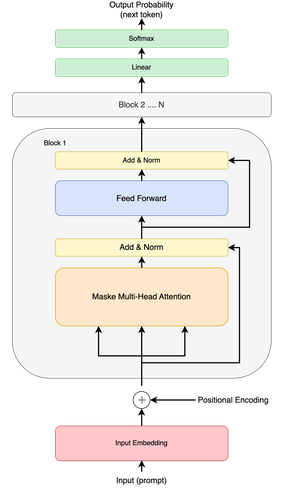

### Start with data

To train a language model, we need a large block of text.

In [ ]:
corpus = "A child who travels is wiser, and more knowledgeable than the mother.A slow but steady walker reached Luoland.Water drank to clear thirst does not kill.The one who climbs has to come down."

In [ ]:
corpus

'A child who travels is wiser, and more knowledgeable than the mother.A slow but steady walker reached Luoland.Water drank to clear thirst does not kill.The one who climbs has to come down.'

To create a dataset, one can break up the corpus to individual sentences.

In [ ]:
# Step 1: Split the corpus into sentences and ensure to keep the full stops.
sentences = [s for s in corpus.split('.') if s.strip()]
print(sentences)

['A child who travels is wiser, and more knowledgeable than the mother', 'A slow but steady walker reached Luoland', 'Water drank to clear thirst does not kill', 'The one who climbs has to come down']


In [ ]:
# Step 2: Tokenize each sentence and treat the full stop as its own token.
tokenized_sentences = []
padding_token = 'PAD'

for sentence in sentences:
    # Tokenizing by splitting on spaces and treating the full stop as a separate token.
    tokens = [segment for segment in sentence.split(' ')]
    tokens.append('.')
    tokenized_sentences.append(tokens)

# Finding the maximum sentence length for padding
max_length = max(len(sentence) for sentence in tokenized_sentences)

# Step 3: Padding each sentence to the maximum length
for sentence in tokenized_sentences:
    while len(sentence) < max_length:
        sentence.append(padding_token)

print(tokenized_sentences)

[['A', 'child', 'who', 'travels', 'is', 'wiser,', 'and', 'more', 'knowledgeable', 'than', 'the', 'mother', '.'], ['A', 'slow', 'but', 'steady', 'walker', 'reached', 'Luoland', '.', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'], ['Water', 'drank', 'to', 'clear', 'thirst', 'does', 'not', 'kill', '.', 'PAD', 'PAD', 'PAD', 'PAD'], ['The', 'one', 'who', 'climbs', 'has', 'to', 'come', 'down', '.', 'PAD', 'PAD', 'PAD', 'PAD']]


In [ ]:
vocab_dict = {0:'PAD'}

words = set([token for sentence in tokenized_sentences for token in sentence])
ind = 0
for i in words:
  ind +=1
  vocab_dict[ind] = i

print(vocab_dict)
print(len(vocab_dict))

{0: 'PAD', 1: 'mother', 2: 'come', 3: '.', 4: 'kill', 5: 'walker', 6: 'travels', 7: 'has', 8: 'the', 9: 'who', 10: 'than', 11: 'Water', 12: 'climbs', 13: 'wiser,', 14: 'The', 15: 'one', 16: 'and', 17: 'is', 18: 'clear', 19: 'not', 20: 'down', 21: 'child', 22: 'knowledgeable', 23: 'A', 24: 'more', 25: 'steady', 26: 'thirst', 27: 'does', 28: 'to', 29: 'but', 30: 'drank', 31: 'PAD', 32: 'slow', 33: 'reached', 34: 'Luoland'}
35


In [ ]:
keys = list(vocab_dict.keys())
values = list(vocab_dict.values())
tokens = [keys[values.index(i)] for i in tokenized_sentences[0]]

In [ ]:
print('Initial:', tokenized_sentences[0], 'Final tokens:', tokens, 'length:', len(tokens), sep='\n')

Initial:
['A', 'child', 'who', 'travels', 'is', 'wiser,', 'and', 'more', 'knowledgeable', 'than', 'the', 'mother', '.']
Final tokens:
[23, 21, 9, 6, 17, 13, 16, 24, 22, 10, 8, 1, 3]
length:
13


## Input embedding on data

Utilizing embedding module of PyTorch, each of the 35 words in our vocabulary gets a vector that represents it. This word embedding will be fed into the model.

During training the word embedding will be updated along with the weights of the model. This embedding method is known as Task-based learning.

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

torch.manual_seed(2)

In [ ]:
?nn.Embedding

In [ ]:
embedding = nn.Embedding(35, 3, padding_idx=0)
input = torch.LongTensor([tokens])
input_embed = embedding(input)
input_embed

tensor([[[ 1.2780,  0.1453,  0.2311],
         [ 0.7078,  2.2181,  0.5232],
         [ 0.0418, -0.2516,  0.8599],
         [-0.7581,  1.0783,  0.8008],
         [ 1.1914, -0.8140, -0.7360],
         [ 0.3211, -0.8798, -0.6011],
         [ 0.0780,  0.5258, -0.4880],
         [ 0.0566,  0.4263,  0.5750],
         [ 0.3466, -0.1973, -1.0546],
         [-0.3097, -0.3957, -0.2234],
         [ 0.6105,  1.3347, -0.2316],
         [-1.2345, -0.0431, -1.6047],
         [-1.4036, -0.7279, -0.5594]]], grad_fn=<EmbeddingBackward0>)

In [ ]:
input_embed.shape

torch.Size([1, 13, 3])

## Positional encoding

Positional encoding entail coming up with a position vector for each word in the sequence and concatenating it with the word vectors from the input embedding layer. To come up with the position vector, wave frequencies were utilised. The wave frequencies were gotten by the formula:
\begin{align}
PE_{(pos,2i)} &= \sin(\frac{pos}{10000^{\frac{2i}{d}}})\\
PE_{(pos,2i+1)} &= \cos(\frac{pos}{10000^{\frac{2i}{d}}})
\end{align}

where $pos$ is the position of the word, i is the dimension in the vector and d the dimension of the vector.

Both cosine and sine are used as this pair has a transformation matrix that can map $\sin(pos)$ and $\cos(pos)$ to $\sin(pos+k)$ and $\cos(pos+k)$. This mapping is crucial in attending to relative positions. From the paper [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), the authors decided to use both sine and cosine as "$PE_{pos+k}$can be represented as a linear function of $PE_{pos}$."

To prove that $PE_{pos+k}$ can be represented as a linear function of $PE_{pos}$, we let M be a $2 \times 2$ matrix such that when multiplied by our $\sin(pos)$ and $\cos(pos)$ pair results in $\sin(pos+k)$ and $\cos(pos+k)$:
\begin{align}
\begin{bmatrix}
x_1 & x_2 \\
x_3 & x_4
\end{bmatrix}
\begin{bmatrix}
\sin(\lambda \cdot pos)\\
\cos(\lambda \cdot pos)
\end{bmatrix} &= \begin{bmatrix}
\sin(\lambda (pos+k))\\
\cos(\lambda (pos+k))
\end{bmatrix}\\
\begin{bmatrix}
\sin(\lambda (pos+k))\\
\cos(\lambda (pos+k))
\end{bmatrix} &= \begin{bmatrix}
\sin(\lambda \cdot pos+\lambda \cdot k)\\
\cos(\lambda \cdot pos+\lambda \cdot k)
\end{bmatrix}
\end{align}
Using the angle summation identity, we can express $PE_{pos+k}$ as:
\begin{align}
\begin{bmatrix}
\sin(\lambda \cdot pos+\lambda \cdot k)\\
\cos(\lambda \cdot pos+\lambda \cdot k)
\end{bmatrix} &= \begin{bmatrix}
\sin(\lambda \cdot pos)\cos(\lambda  \cdot k) + \cos(\lambda \cdot pos)\sin(\lambda \cdot k)\\
\cos(\lambda \cdot pos)\cos(\lambda \cdot k) - \sin(\lambda \cdot pos)\sin(\lambda \cdot k)
\end{bmatrix}
\end{align}

Solving for the elements in matrix M, we find:
\begin{align}
\begin{bmatrix}
x_1 & x_2 \\
x_3 & x_4
\end{bmatrix}
\begin{bmatrix}
\sin(\lambda \cdot pos)\\
\cos(\lambda \cdot pos)
\end{bmatrix} &= \begin{bmatrix}
\sin(\lambda \cdot pos)\cos(\lambda \cdot k) + \cos(\lambda \cdot pos)\sin(\lambda \cdot k)\\
\cos(\lambda \cdot pos)\cos(\lambda \cdot k) - \sin(\lambda \cdot pos)\sin(\lambda \cdot k)
\end{bmatrix}
\end{align}
where $x_1 = \cos(\lambda \cdot k), x_2 = \sin(\lambda \cdot k), x_3 = -\sin(\lambda \cdot k), x_4 = \cos(\lambda \cdot k)$. Therefore: $$ M = \begin{bmatrix}
\cos(\lambda \cdot k) & \sin(\lambda \cdot k)\\
-\sin(\lambda \cdot k) & \cos(\lambda \cdot k)
\end{bmatrix}$$
Thus $PE_{pos+k}$ can be represented as a linear function of $PE_{pos}$

This transformation for any k, ensures that the model can attend to relative positions.

In [ ]:
# Concatenating positional encoding
seq_length=input_embed.shape[1]
d = input_embed.shape[2]

PE = np.empty((13, 3))
for pos in range(seq_length):
  for i in range(d):
    if i%2==0:
      PE[pos,i] = np.sin(pos/(10000)**(2*i/d))
    else:
      PE[pos,i] = np.cos(pos/(10000)**(2*i/d))


In [ ]:
print(PE)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 8.41470985e-01  9.99997679e-01  4.64158883e-06]
 [ 9.09297427e-01  9.99990717e-01  9.28317767e-06]
 [ 1.41120008e-01  9.99979113e-01  1.39247665e-05]
 [-7.56802495e-01  9.99962868e-01  1.85663553e-05]
 [-9.58924275e-01  9.99941981e-01  2.32079442e-05]
 [-2.79415498e-01  9.99916453e-01  2.78495330e-05]
 [ 6.56986599e-01  9.99886283e-01  3.24911218e-05]
 [ 9.89358247e-01  9.99851473e-01  3.71327107e-05]
 [ 4.12118485e-01  9.99812022e-01  4.17742995e-05]
 [-5.44021111e-01  9.99767930e-01  4.64158883e-05]
 [-9.99990207e-01  9.99719197e-01  5.10574771e-05]
 [-5.36572918e-01  9.99665824e-01  5.56990660e-05]]


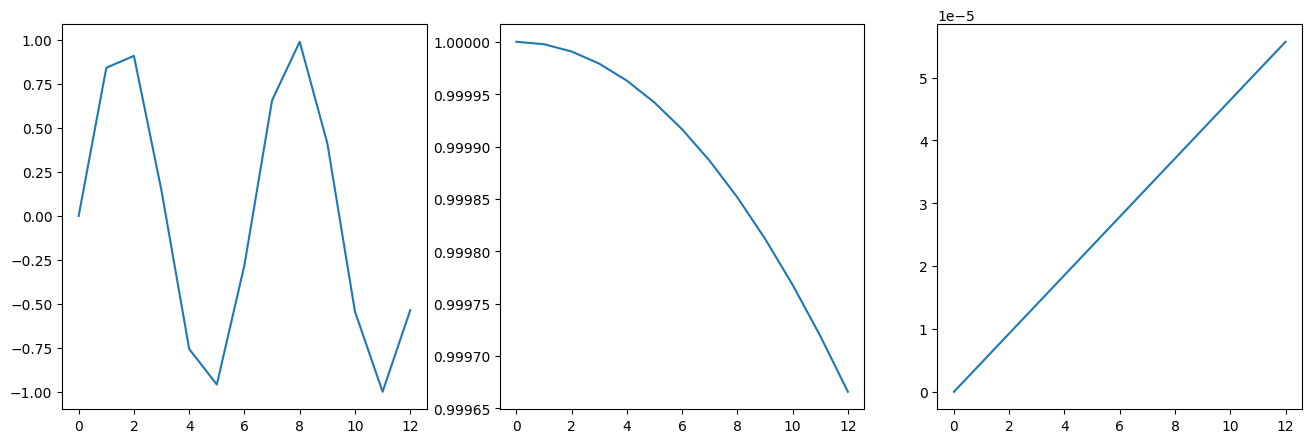

In [ ]:
pos = np.arange(0,seq_length,1)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))
ax1.plot(pos,PE[:,0])
ax2.plot(pos,PE[:,1])
ax3.plot(pos,PE[:,2])
plt.show()

With higher dimensions, $i$, the frequency of the wave gets much lower. After getting the positional embedding we, concatenate it with the input embedding.

In [ ]:
input_embed = input_embed.detach().numpy()
for i in range(input_embed.shape[0]):
  input_embed[i] = input_embed[i] + PE

input_embed

array([[[ 1.2779956 ,  1.1453377 ,  0.23105137],
        [ 1.5492833 ,  3.2180734 ,  0.5231702 ],
        [ 0.9510569 ,  0.7484154 ,  0.8598678 ],
        [-0.61701113,  2.0782967 ,  0.8008145 ],
        [ 0.43456656,  0.18595523, -0.73597425],
        [-0.63782126,  0.12015615, -0.60111886],
        [-0.20139162,  1.5257252 , -0.48796389],
        [ 0.71360844,  1.4261824 ,  0.57503754],
        [ 1.336005  ,  0.80252004, -1.0545518 ],
        [ 0.10239171,  0.60410154, -0.22332415],
        [ 0.06644537,  2.3345058 , -0.2315779 ],
        [-2.234535  ,  0.95665175, -1.6046159 ],
        [-1.9401801 ,  0.2717845 , -0.5593745 ]]], dtype=float32)

### Attention head

Here we compute how the sequence related to itself using self-attention. To compute self-attention, we multiply the input vector or rather matrix with 3 weight matrices to get the query, key and value matrices. These matrices shall be used to compute self attention using the following formula:
$$ Self Attention = Softmax(\frac{Q\times K^T}{\sqrt{d_k}})V$$
Where Q, K, V are the result matrix multiplication of weight matrices and input matrix. $d_k$ is the dimension of the model or rather the dimensions of the query, key matrices. As the weight matrices are trained, we can initialize them randomly and the beginning as they will be updated in each iteration of training.

Looking deeper at self attention, we note that using the query of the different word vectors we get their similarity with every other word's key vector. This is achieved by dot product, see the image below for illustration: ![picture](https://drive.google.com/uc?id=1agUuSuWhz1Og78kDUPhJHJow5Ybqc6sJ)

Scaling done by dividing the dot product with the square root of the dimension $\sqrt{d_k}$ is done so to prevent vanishing gradients caused by dot products that can grow large in size.

In [ ]:
# Initializing weight matrices for query, key and value matrices
WQ = np.random.rand(3,13)
WK = np.random.rand(3,13)
WV = np.random.rand(3,3)

In [ ]:
# Matrix multiplication of input and weight
Q = input_embed[0] @ WQ
K = input_embed[0] @ WK
V = input_embed[0] @ WV

print(Q,'\n',K,'\n',V)

[[ 7.67995509e-01  1.54207425e+00  1.28242332e+00  1.12427544e+00
   9.40788529e-01  7.33483056e-01  4.22816574e-01  2.02698878e+00
   1.15110051e+00  1.42629922e+00  5.16296353e-01  1.78446193e+00
   2.12124263e+00]
 [ 1.36805494e+00  2.32708397e+00  2.03420877e+00  1.93086690e+00
   2.24827111e+00  1.72092360e+00  1.06121776e+00  3.80736832e+00
   1.88538878e+00  2.46007729e+00  1.37023534e+00  3.02143091e+00
   4.17441361e+00]
 [ 6.86819884e-01  1.48243765e+00  1.34282887e+00  8.36999079e-01
   1.06352667e+00  6.18262178e-01  3.29136967e-01  2.09761906e+00
   1.50640984e+00  1.58717772e+00  5.55695450e-01  1.34775437e+00
   1.96768806e+00]
 [ 3.70109905e-01  2.03091313e-01  4.03934754e-01  3.00124855e-01
   1.48086503e+00  9.38017727e-01  6.21516574e-01  1.49705281e+00
   6.92307115e-01  8.17650912e-01  9.92646860e-01  4.27620798e-01
   1.66614594e+00]
 [ 5.52934150e-02  6.84966399e-02 -8.37967548e-02  2.82546084e-01
  -2.81755684e-01  2.26110710e-02  3.15204786e-02 -2.08166894e-01


In [ ]:
print(Q.shape,K.shape,V.shape, sep='\n')

(13, 13)
(13, 13)
(13, 3)


In [ ]:
# @title Computing Self-attention $ = Softmax(\frac{Q\times K^T}{\sqrt{d_k}})V$
softmax = lambda x: np.exp(x)/sum(np.exp(x))

self_attention = lambda q,k,v: softmax((q @ k.T)/np.sqrt(13)) @ v

(13, 3)


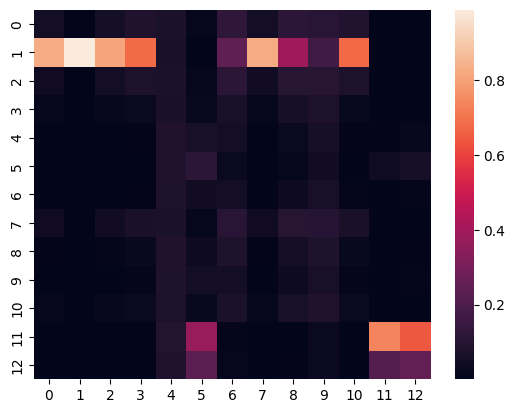

In [ ]:
# Encoder self-attention
enc_self_attention = self_attention(Q,K,V)

print(enc_self_attention.shape)

ax = sns.heatmap(softmax((Q @ K.T)/np.sqrt(35)))

### Add and Norm

Add and norm layer is essential in counteracting some of the problems caused during training.

**Residue connection**

In the add and norm layer, we add the result of the previous sublayer to its input. During training, some information may be lost due to the various transformations the data goes through thus adding the input preserves this information as the data moves to the next sublayer/layer. Computation of residual connection can be summarized as:

$$ res = x + sublayer(x)$$

where $x$ is the input of the previous sublayer and $sublayer(x)$ is the output of the previous sublayer.

**Layer Normalization**

We normalize the output of the residual connection step in layer normalization using the mean and standard deviation of the output of the residual connection. This process aids the in handling large values from the previous layer that would impact the values of the next layer making convergence a lot slower during backpropagation. Essentially layer norm enables the transformer to train faster. To perform normalization, we use:

$$LayerNorm = \frac{res - \mu}{\sigma + \epsilon}$$

where $\mu$ is the position-wise mean and $\sigma$ is the position-wise standard deviation. Thus each value of the residual connection($res$) is normalized.

In [ ]:
# @title # Compute add and norm
def add_and_norm(x,y):
  # Residual connection
  res = x + y

  # Layer normalization
  mean = res.mean(-1,keepdims=True)
  std = res.std(-1,keepdims=True)

  return np.ones(res.shape) * (res - mean) / (std + 1e-6) + np.zeros(res.shape)

In [ ]:
layernorm = add_and_norm(input_embed[0],enc_self_attention)
layernorm

array([[ 0.96651256,  0.41082698, -1.37733954],
       [ 1.32321993, -0.22938877, -1.09383116],
       [ 1.41350366, -0.74532279, -0.66818087],
       [-1.22338523,  1.22609773, -0.0027125 ],
       [ 0.95330782,  0.42799939, -1.38130721],
       [-0.58154896,  1.40717165, -0.82562269],
       [-0.49125256,  1.39410346, -0.9028509 ],
       [-0.1628041 ,  1.29800113, -1.13519704],
       [ 0.9698137 ,  0.40649276, -1.37630646],
       [-0.04765225,  1.24787209, -1.20021984],
       [-0.51414543,  1.39801015, -0.88386472],
       [-0.1025749 ,  1.27280605, -1.17023115],
       [-1.03014434,  1.35417818, -0.32403384]])

### Position-wise Feed-Forward Network

This involves taking the output from the layer normalization through a neural network with one layer. That is:
$$ FFN(x) = max(0,xW_1 + b_1)W_2 + b_2$$
where $x$ is the output from the previous layer. $x$ becomes the design matrix with each row representing different positions vectors which will be treated as one observation.  

In [ ]:
# Position-wise feed forward network
def ffn(x):
  x = torch.from_numpy(x).float()
  l1 = nn.Linear(3, 12)
  l2 = nn.Linear(12, 3)
  return l2(F.relu(l1(x))).detach().numpy()

In [ ]:
enc_output = ffn(layernorm)

In [ ]:
# Add and normalize
layernorm2 = add_and_norm(enc_output, layernorm)
layernorm2

array([[ 0.73167669,  0.68224671, -1.4139234 ],
       [ 1.33660484, -0.26816379, -1.06844105],
       [ 1.40026205, -0.87172813, -0.52853392],
       [-1.21831097,  1.23107712, -0.01276614],
       [ 0.70833518,  0.7058755 , -1.41421068],
       [-0.83808422,  1.40555556, -0.56747134],
       [-0.78636384,  1.4111316 , -0.62476777],
       [-0.58672426,  1.40772894, -0.82100468],
       [ 0.73756862,  0.67619882, -1.41376744],
       [-0.50920267,  1.39720003, -0.88799737],
       [-0.79954731,  1.4099918 , -0.6104445 ],
       [-0.54684121,  1.40289875, -0.85605754],
       [-1.09786302,  1.32095505, -0.22309204]])

## Decoder stack

### Masked self attention

During training, we feed the target sentence to the decoder stack. This is to facilitate teacher forcing where regardless of the output of the model it know the correct result it should get. With the masked self-attention, we offset the values of the sequence yet to be seen. Thus the masked self attention has the following formula:
$$ Self Attention = Softmax(\frac{(Q\times K^T) + M}{\sqrt{d_k}})V$$
where M is a special triangular matrix which has the upper triangles set to $-\infty$ and the rest are zeros. After normalization this results, the resultant matrix has the weights spread out in previous segments and not the ones not seen before.

In [ ]:
# computing masked self attention
M = np.triu(np.ones((13,13)), k=1)
M [M > 0] = float('-inf')
M

array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf,
        -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 

In [ ]:
masked_self_attention = softmax(((Q @ K.T) + M)/np.sqrt(13)) @ V
masked_self_attention

array([[ 0.01084907,  0.00525249,  0.01172614],
       [ 3.93571665,  2.00118125,  3.23339261],
       [ 0.46505275,  0.27482374,  0.64425955],
       [ 0.23338562,  0.14874038,  0.13540717],
       [ 0.01991717, -0.00487675, -0.01260037],
       [-0.02220063, -0.03326391, -0.10033378],
       [ 0.10074509,  0.03398719, -0.06312873],
       [ 2.61875358,  1.52261346,  1.46863392],
       [ 0.60547392,  0.20786981,  0.13916694],
       [ 0.32090042,  0.09791805, -0.00955555],
       [ 2.4309272 ,  1.1034247 ,  0.38939596],
       [-0.78531279, -0.55111483, -3.29565443],
       [-0.81757781, -0.42786584, -2.70020644]])

In [ ]:
# Adding and normalizing
dlayernorm = add_and_norm(input_embed, masked_self_attention)

In [ ]:
dlayernorm

array([[[ 0.8508411 ,  0.55286652, -1.40370762],
        [ 0.87470902,  0.52501712, -1.39972614],
        [ 0.48607099, -1.39316022,  0.90708924],
        [-1.2292583 ,  1.22017866,  0.00907964],
        [ 0.95577222,  0.42481471, -1.38058693],
        [-0.64914995,  1.41266733, -0.76351738],
        [-0.4443165 ,  1.38488514, -0.94056865],
        [ 1.03172543,  0.32178365, -1.35350908],
        [ 1.06137075,  0.27870735, -1.3400781 ],
        [ 0.32103525,  1.03225001, -1.35328525],
        [ 0.33814167,  1.02014865, -1.35829032],
        [-0.23445987,  1.32502547, -1.0905656 ],
        [-0.51457907,  1.39808052, -0.88350146]]])

## Linear and softmax

This linear layer and softmax layer help in getting the probabilities of the translation being a certain word in the vocabulary. To make the translation, we pick the word with the highest probability.

In [ ]:
lin = nn.Linear(3, 35)

result = softmax(lin(torch.from_numpy(dlayernorm).float()).detach().numpy())

In [ ]:
result

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1

In [ ]:
max_index_row = np.argmax(result, axis=1)

print(max_index_row)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
for i in max_index_row[0]:
  print(vocab_dict[i],end=' ')

PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD 

# Finetuning a pretrained model

In [ ]:
!pip install torch==1.11.0
!pip install transformers==4.31.0
!pip install datasets==1.18.0
!pip install sentencepiece==0.1.96
!pip install sacrebleu==2.0.0
!pip install accelerate==0.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import AutoConfig, AutoModelForCausalLM
from transformers import Trainer, TrainingArguments

In [ ]:
# Load dataset
datasets = load_dataset('wikitext', 'wikitext-2-raw-v1')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
datasets

DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

In [ ]:
model_checkpoint = "gpt2"
tokenizer_checkpoint = "sgugger/gpt2-like-tokenizer"

In [ ]:
# Loading tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"])

tokenized_datasets = datasets.map(tokenize_function, batched=True, num_proc=4, remove_columns=["text"])

In [ ]:
tokenized_datasets["train"][1]

{'input_ids': [238, 8576, 9441, 2987, 238, 252],
 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
datasets["train"][1]

{'text': ' = Valkyria Chronicles III = \n'}

In [ ]:
# block_size = tokenizer.model_max_length
block_size = 128

def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
        # customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [ ]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1000,
    num_proc=4,
)

In [ ]:
lm_datasets

DatasetDict({
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2202
    })
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 17991
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1934
    })
})

In [ ]:
# Load pretrained model
config = AutoConfig.from_pretrained(model_checkpoint)
model = AutoModelForCausalLM.from_config(config)

In [ ]:
# Setting hyperparameters for training
training_args = TrainingArguments(
    f"{model_checkpoint}-wikitext2",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    weight_decay=0.01
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["validation"],
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,6.552900,6.477514
2,6.197200,6.206111
3,6.022000,6.118332


TrainOutput(global_step=6747, training_loss=6.396705302906616, metrics={'train_runtime': 2573.1861, 'train_samples_per_second': 20.975, 'train_steps_per_second': 2.622, 'total_flos': 3525678710784000.0, 'train_loss': 6.396705302906616, 'epoch': 3.0})

In [ ]:
import math
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 454.11


## Resources for finetuning

Finetuning with huggingface: https://github.com/huggingface/transformers/tree/main/notebooks